# Making chrolopleth map with Geopandas
This is a tutorial of how to make cloropleth maps with geopandas. 

In [89]:
#imoprt packages
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

The data can be downloaded at:  https://geoportal.statistics.gov.uk/datasets/ae90afc385c04d869bc8cf8890bd1bcd_1?geometry=-75.477%2C46.019%2C70.686%2C63.435

Download the shapefile and be sure to extract all the files (6 files) in a folder. 
Then read the .shp file.

In [219]:
# import data
uk_map = gpd.read_file(r'C:\Users\2166611p\OneDrive - University of Glasgow\Desktop\PhD\Scripts\JupyterNotebooks\GB_maps\Local_Authority_Districts__December_2017__Boundaries_in_Great_Britain.shp')
uk_map.head()

,objectid,lad17cd,lad17nm,lad17nmw,bng_e,bng_n,long,lat,st_areasha,st_lengths,geometry
0,1,E06000001,Hartlepool,None,447157,531476,-1.27023,54.676159,9.355951e+07,71707.407523,"MULTIPOLYGON (((447213.900 537036.104, 447228...."
1,2,E06000002,Middlesbrough,None,451141,516887,-1.21099,54.544670,5.388858e+07,43840.866561,"MULTIPOLYGON (((448958.901 521835.695, 449045...."
2,3,E06000003,Redcar and Cleveland,None,464359,519597,-1.00611,54.567520,2.448203e+08,97993.391012,"MULTIPOLYGON (((455752.600 528195.705, 455738...."
3,4,E06000004,Stockton-on-Tees,None,444937,518183,-1.30669,54.556911,2.049622e+08,119581.595543,"MULTIPOLYGON (((444157.002 527956.303, 444165...."
4,5,E06000005,Darlington,None,428029,515649,-1.56835,54.535351,1.974757e+08,107206.401694,"POLYGON ((423496.602 524724.298, 423497.204 52..."


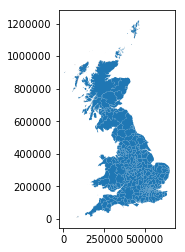

In [220]:
# plotting the map 
uk_map.plot()

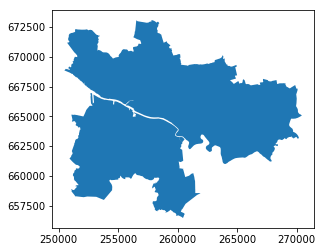

In [232]:
# ploting an specific council 
uk_map.loc[uk_map['lad17nm'] == 'Glasgow City'].plot()

Now that we have the map, we need to load the data we want to include in the map. In this case, we want the daily cases and daily deaths per council area

In [28]:
# import data
url2 = "https://www.opendata.nhs.scot/dataset/b318bddf-a4dc-4262-971f-0ba329e09b87/resource/427f9a25-db22-4014-a3bc-893b68243055/download/trend_ca_20201012.csv"
df2 = pd.read_csv(url2)
df2.head()

,Date,CA,CAName,DailyPositive,CumulativePositive,CrudeRatePositive,DailyDeaths,CumulativeDeaths,CrudeRateDeaths,CumulativeNegative,CrudeRateNegative
0,20200228,S12000005,Clackmannanshire,0,0,0.0,0,0,0.0,13,25.223128
1,20200228,S12000006,Dumfries & Galloway,0,0,0.0,0,0,0.0,21,14.107215
2,20200228,S12000008,East Ayrshire,0,0,0.0,0,0,0.0,10,8.196050
3,20200228,S12000010,East Lothian,0,0,0.0,0,0,0.0,13,12.139322
4,20200228,S12000011,East Renfrewshire,0,0,0.0,0,0,0.0,6,6.280750


In [43]:
# Extract date, council name, dailypositive and dailydeaths
df_council = df2[["CAName","DailyPositive",'DailyDeaths']].copy()

# Group by council name and sum cases
df_council_d = df_council.groupby(['CAName']).sum()

Since we have the map of all UK, we need to extract only scotland council names.
There are two way to do this: We can create a new data frame with the names of the council with a for loop, or we just use the index to extract only scotalnd. We are going to use the second approach

In [35]:
# extrac council names
x = df_council.CAName.unique()
x

In [222]:
#df_scotland = pd.DataFrame()
# Check what indexes are for Scotland

for i in x:
    a = uk_map.loc[uk_map['lad17nm'] == i]
    print(a)

     objectid    lad17cd           lad17nm lad17nmw   bng_e   bng_n     long  \
326       327  S12000005  Clackmannanshire     None  291159  696335 -3.75344   

          lat    st_areasha    st_lengths  \
326  56.14724  1.589721e+08  94185.457178   

                                              geometry  
326  MULTIPOLYGON (((290674.497 703671.495, 290731....  
Empty GeoDataFrame
Columns: [objectid, lad17cd, lad17nm, lad17nmw, bng_e, bng_n, long, lat, st_areasha, st_lengths, geometry]
Index: []
     objectid    lad17cd        lad17nm lad17nmw   bng_e   bng_n     long  \
328       329  S12000008  East Ayrshire     None  255398  624935 -4.29057   

           lat    st_areasha     st_lengths  \
328  55.496738  1.270342e+09  340970.913052   

                                              geometry  
328  POLYGON ((243071.200 655079.705, 243096.298 65...  
     objectid    lad17cd       lad17nm lad17nmw   bng_e   bng_n     long  \
329       330  S12000010  East Lothian     None  354854  6

     objectid    lad17cd            lad17nm lad17nmw   bng_e   bng_n    long  \
355       356  S12000044  North Lanarkshire     None  277984  665608 -3.9514   

           lat    st_areasha     st_lengths  \
355  55.868141  4.722161e+08  164226.594781   

                                              geometry  
355  POLYGON ((272346.600 683872.603, 272407.201 68...  


In [234]:
# Select the rows with scotland council names
df_scotland = uk_map.iloc[326:358,:]
df_scotland.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 32 entries, 326 to 357
Data columns (total 11 columns):
objectid      32 non-null int64
lad17cd       32 non-null object
lad17nm       32 non-null object
lad17nmw      0 non-null object
bng_e         32 non-null int64
bng_n         32 non-null int64
long          32 non-null float64
lat           32 non-null float64
st_areasha    32 non-null float64
st_lengths    32 non-null float64
geometry      32 non-null geometry
dtypes: float64(4), geometry(1), int64(3), object(3)
memory usage: 2.8+ KB


In [252]:
df_scotland.head()

,objectid,lad17cd,CAName,lad17nmw,bng_e,bng_n,long,lat,st_areasha,st_lengths,geometry
326,327,S12000005,Clackmannanshire,None,291159,696335,-3.75344,56.147240,1.589721e+08,9.418546e+04,"MULTIPOLYGON (((290674.497 703671.495, 290731...."
327,328,S12000006,Dumfries and Galloway,None,270645,579857,-4.02863,55.096218,6.437605e+09,1.148244e+06,"MULTIPOLYGON (((275243.502 620000.096, 275369...."
328,329,S12000008,East Ayrshire,None,255398,624935,-4.29057,55.496738,1.270342e+09,3.409709e+05,"POLYGON ((243071.200 655079.705, 243096.298 65..."
329,330,S12000010,East Lothian,None,354854,672351,-2.72435,55.942070,6.791798e+08,2.002903e+05,"MULTIPOLYGON (((351149.002 686139.204, 351161...."
330,331,S12000011,East Renfrewshire,None,251929,653115,-4.36060,55.748680,1.742495e+08,9.388251e+04,"POLYGON ((251761.502 660808.205, 251749.102 66..."


In [237]:
# rename the lad17nm column to match CANname of covid-19 soctland data

df_scotland_council = df_scotland.rename(columns={'lad17nm':'CAName'})

# set index to the council names
df_scotland_council.set_index("CAName",inplace=True)



In [238]:
df_scotland_council.head()

,objectid,lad17cd,lad17nmw,bng_e,bng_n,long,lat,st_areasha,st_lengths,geometry
CAName,,,,,,,,,,
Clackmannanshire,327,S12000005,None,291159,696335,-3.75344,56.147240,1.589721e+08,9.418546e+04,"MULTIPOLYGON (((290674.497 703671.495, 290731...."
Dumfries and Galloway,328,S12000006,None,270645,579857,-4.02863,55.096218,6.437605e+09,1.148244e+06,"MULTIPOLYGON (((275243.502 620000.096, 275369...."
East Ayrshire,329,S12000008,None,255398,624935,-4.29057,55.496738,1.270342e+09,3.409709e+05,"POLYGON ((243071.200 655079.705, 243096.298 65..."
East Lothian,330,S12000010,None,354854,672351,-2.72435,55.942070,6.791798e+08,2.002903e+05,"MULTIPOLYGON (((351149.002 686139.204, 351161...."
East Renfrewshire,331,S12000011,None,251929,653115,-4.36060,55.748680,1.742495e+08,9.388251e+04,"POLYGON ((251761.502 660808.205, 251749.102 66..."


In [228]:
# rename the names of these two councils to macth one another, otherwise the merge will not work out
df_council_d.rename(index = {"Argyll & Bute":"Argyll and Bute",
                          "Dumfries & Galloway":"Dumbfries and Galloway",
                          "Perth & Kinross":"Perth and Kinross"},inplace=True)

df_council_d.head()

,DailyPositive,DailyDeaths
CAName,,
Aberdeen City,1924,83
Aberdeenshire,889,60
Angus,739,48
Argyll and Bute,406,39
City of Edinburgh,5164,274


In [241]:
#merge the two dataframes
result = pd.merge(df_scotland_council, df_council_d,left_index=True, right_index=True)

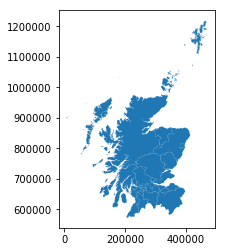

In [242]:
# plot to make shure all teh councils are plotted
result.plot()

In [243]:
result.head()

,objectid,lad17cd,lad17nmw,bng_e,bng_n,long,lat,st_areasha,st_lengths,geometry,DailyPositive,DailyDeaths
CAName,,,,,,,,,,,,
Clackmannanshire,327,S12000005,None,291159,696335,-3.75344,56.147240,1.589721e+08,9.418546e+04,"MULTIPOLYGON (((290674.497 703671.495, 290731....",412,31
East Ayrshire,329,S12000008,None,255398,624935,-4.29057,55.496738,1.270342e+09,3.409709e+05,"POLYGON ((243071.200 655079.705, 243096.298 65...",1373,61
East Lothian,330,S12000010,None,354854,672351,-2.72435,55.942070,6.791798e+08,2.002903e+05,"MULTIPOLYGON (((351149.002 686139.204, 351161....",646,62
East Renfrewshire,331,S12000011,None,251929,653115,-4.36060,55.748680,1.742495e+08,9.388251e+04,"POLYGON ((251761.502 660808.205, 251749.102 66...",1167,59
Na h-Eileanan Siar,332,S12000013,None,126473,932862,-6.65722,58.199379,3.099789e+09,3.929819e+06,"MULTIPOLYGON (((151918.504 966517.497, 151920....",68,1


## Making the plot
We will plot the map and over the map we are going to put the Daily deaths data 

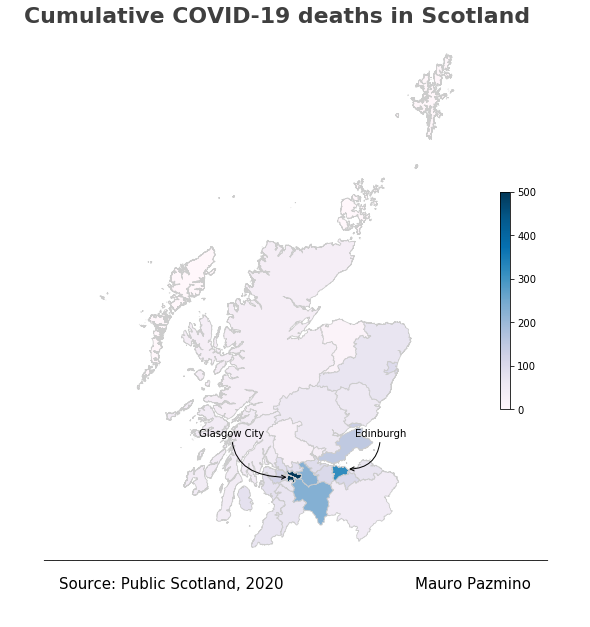

In [251]:
plt.rcParams['font.family'] = "DejaVu Sans" #set the font

# set a variable that will call with daily deaths to visualize on the map
variable = 'DailyDeaths'

# set the range for the choropleth (number of deaths)
vmin, vmax = 0, 500

# create figure and axes for Matplotlib
fig, ax = plt.subplots(figsize=(10, 10))

# create map
result.plot(column=variable, cmap='PuBu', linewidth=0.8, ax=ax,edgecolor='0.8')
#edgecolor='0.8'

ax.axis('off')

# add a title
ax.set_title('Cumulative COVID-19 deaths in Scotland',fontsize=22,fontweight='bold',alpha=.75)
#ax.text(0.1, 1, 'Cumulative COVID-19 deaths in Scotland',horizontalalignment='right',fontsize=22, fontweight='bold', alpha=.75,transform=ax.transAxes)

# Annotate the plot

ax.annotate('Source: Public Scotland, 2020',
           xy=(0.1, .08), xycoords='figure fraction',
           horizontalalignment='left', verticalalignment='top',
           fontsize=15, color='k')

ax.annotate('Mauro Pazmino',
           xy=(0.9, .08), xycoords='figure fraction',
           horizontalalignment='right', verticalalignment='top',
           fontsize=15, color='k')

# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap='PuBu', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []

# size of colorbar
cbar = fig.colorbar(sm,shrink=0.4)

# Annotate where glasgow and edinburg are located
ax.annotate("Glasgow City",
            xy=(0.53, 0.175), xycoords='axes fraction',
            xytext=(0.3, 0.25), textcoords='axes fraction',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="angle3"),
            )

ax.annotate("Edinburgh",
            xy=(0.68, 0.19), xycoords='axes fraction',
            xytext=(0.7, 0.25), textcoords='axes fraction',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="angle3"),
            )

fig.text(0.15,0.145,'_____________________________________________________________________________________________________')
fig.savefig(r'C:\Users\2166611p\OneDrive - University of Glasgow\Desktop\PhD\Scripts\Python Scripts\Scotland_maps.png',bbox_inches ='tight')

## References
Tutorials I used to learn to make the maps:

https://towardsdatascience.com/geospatial-adventures-step-2-pandas-vs-geopandas-16e842d0e3a7

https://github.com/bendoesdata/make-a-map-geopandas/blob/master/Let's%20make%20a%20map!%20Geopandas%20and%20Matplotlib.ipynb

https://medium.com/@sgwooduk/command-line-cartography-for-a-uk-election-part-2-fe5a9fe03289

